# 1 a) and 1 b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# DFT function which takes a list input and return the calculated list of DFT
def DFT(list1):
    N=len(list1)
    X=[0.]*N
    for i in range(0,N):
        j=0
        for j in range(0,N):
            X[i]+=list1[j]*np.exp(complex(0,-i*j*2*np.pi/N))
    return X

# IDFT function that takes a list input and returns IDFT of that list
def IDFT(list1):
    N=len(list1)
    x=[0.]*N
    for i in range(0,N):
        j=0
        for j in range(0,N): 
            x[i]+=(list1[j]*np.exp(complex(0,i*j*2*np.pi/N)))/N
    return x


# 1 c)

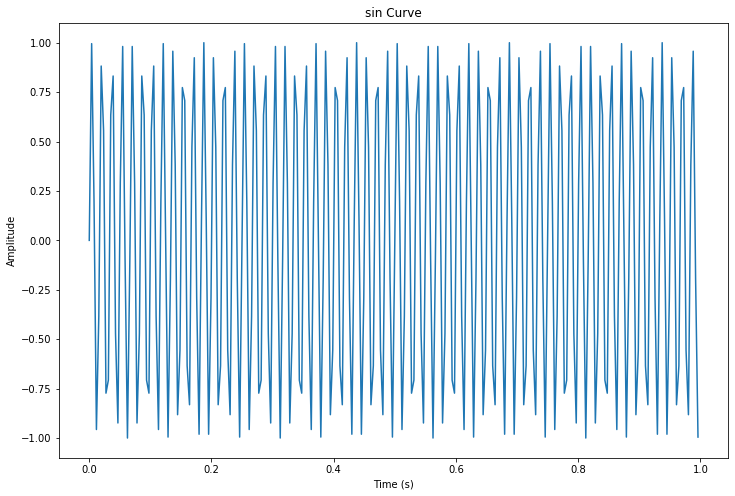

In [4]:
# 100 cycles of sin wave at 60 hz sampled at 256 Hz

A=1.0 # Amplitude of the sin wave
f=60.0 # frequency of the sin wave in Hz
T=1/f
fs=256
Ts=1/fs # horizontal spacing of the points that "fake" a continuous signal
cycles=60 # how many cycles of the wave to save
t=np.arange(0,cycles*T,Ts) # horizontal coordinate of your sin curve
x=A*np.sin(2*np.pi*f*t) # vertical value of your sin curve

plt.figure(figsize=(12,8))
plt.plot(t,x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("sin Curve")
plt.show()

# 1 d)

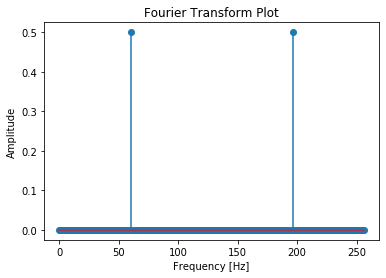

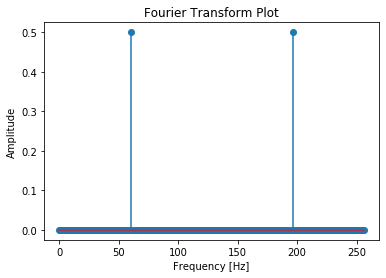

In [25]:
# Testing DFT function and comparing it to np.fft.fft

tr=DFT(x)
length=len(x)
Tsamp1=1/fs
f1 = np.linspace(0, 1 / Tsamp1, length)
plt.stem(f1,np.abs(tr)/length,use_line_collection=True)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot")
plt.show()

# Running fourier transform on our ZOH and plotting frequency spectrum as stem
# plot
fft1 = np.fft.fft(x) #x is your stem plot data

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot")
plt.stem(f1,np.abs(fft1)/length,use_line_collection=True)
plt.show()


# 1 e)

C:\Anaconda\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


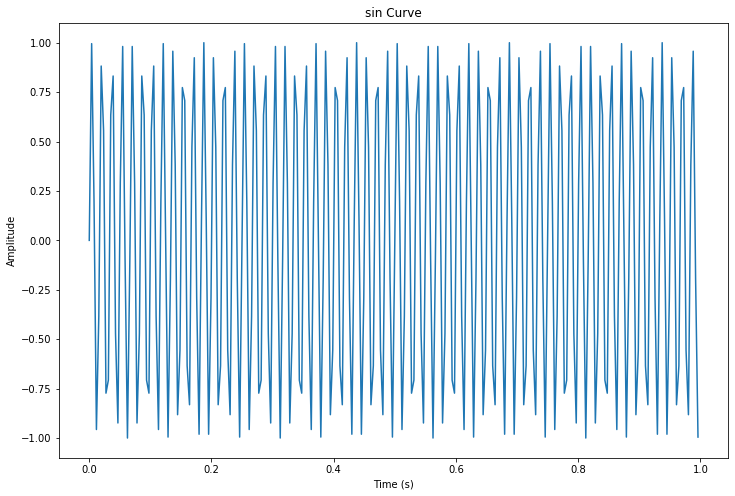

In [6]:
# Running IDFT to return original sin wave 

rt=IDFT(tr)

plt.figure(figsize=(12,8))
plt.plot(t,rt)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("sin Curve")
plt.show()

# 1 f)

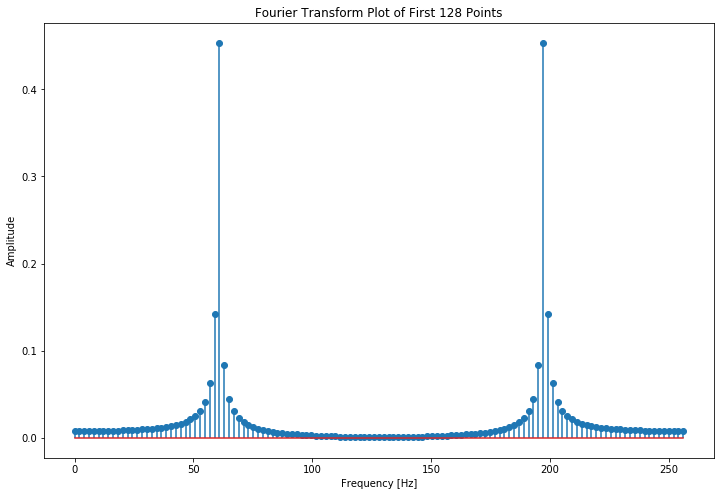

In [7]:
# DFT of the first 128 samples of above sin wave

tr2=DFT(x[0:127])
length2=len(tr2)
Tsamp1=1/fs
f2 = np.linspace(0, 1 / Tsamp1, length2)

plt.figure(figsize=(12,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot of First 128 Points")
plt.stem(f2,np.abs(tr2)/length2,use_line_collection=True)
plt.show()

# 1 g)

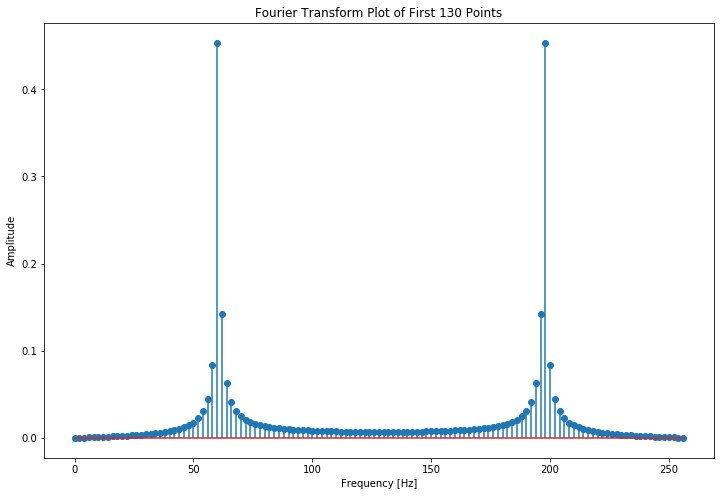

In [8]:
# DFT of first 130 samples of sin wave from 1c)

tr3=DFT(x[0:129])
length3=len(tr3)
Tsamp1=1/fs
f3 = np.linspace(0, 1 / Tsamp1, length3)

plt.figure(figsize=(12,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot of First 130 Points")
plt.stem(f3,np.abs(tr3)/length3,use_line_collection=True)
plt.show()

# Need more points than half the sampling frequency in order to improve the resolution. The two DFTs seem to be mirror 
# images of one another which might sugguest that the resolution behaves periodically with the length of the DFT and 
# sampling frequency

# 1 h)

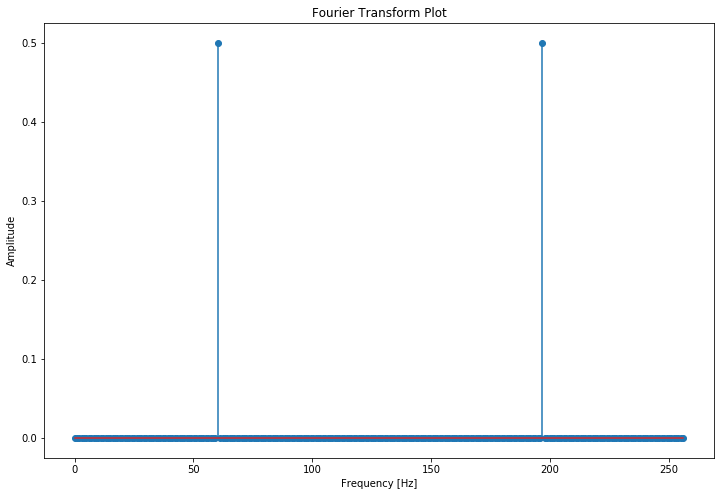

In [9]:
# DFT of first 260 points of sin wav 

tr4=DFT(x[0:259])
length4=len(tr4)
Tsamp1=1/fs
f4 = np.linspace(0, 1 / Tsamp1, length4)

plt.figure(figsize=(12,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot")
plt.stem(f4,np.abs(tr4)/length4,use_line_collection=True)
plt.show()


# This produces a DFT with better resolution because more points are being used to calculate the full DFT

# 1 i)

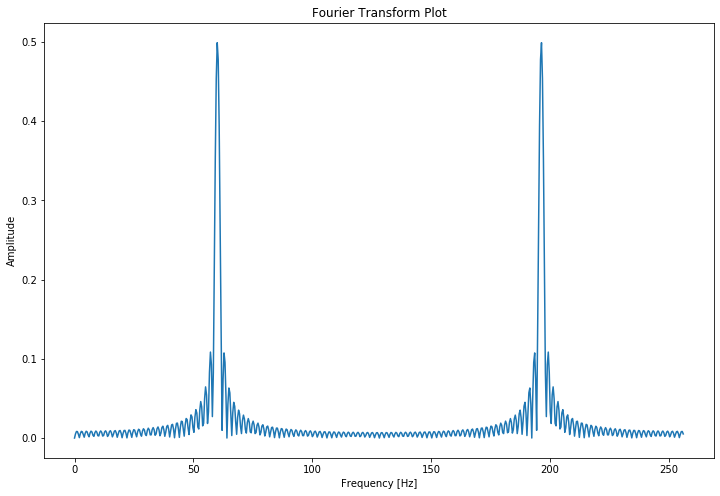

In [10]:
# 

DTFT=[0.]*628
for i in range(0,128):
    DTFT[i]=x[i]

    
tr5=DFT(DTFT)
length5=len(tr5)
Tsamp1=1/fs
f5 = np.linspace(0, 1 / Tsamp1, length5)

plt.figure(figsize=(12,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot")
plt.plot(f5,np.abs(tr5)/128)
plt.show()

# This method has ripples of the DFT which reduce and go up around the base and the other method has increasing amplitudes 
# for DFT almost as if continously increasing 

# 1 j)

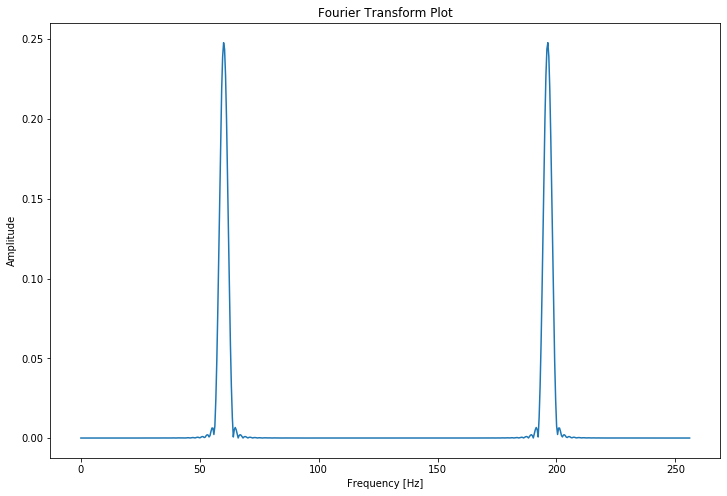

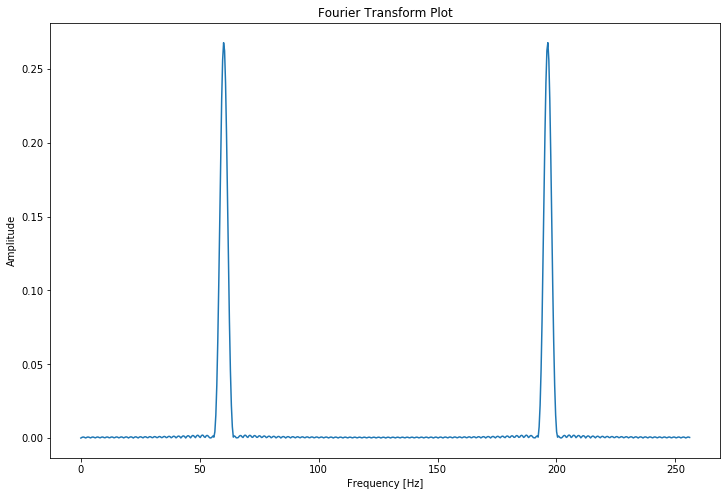

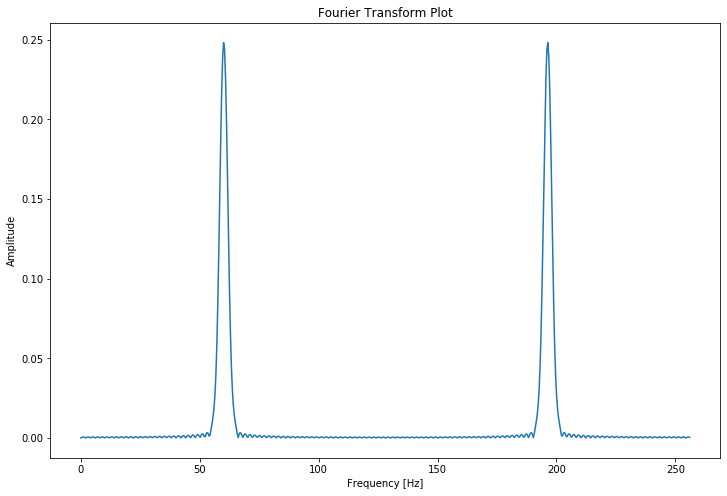

Run time: 5.797 s


In [11]:
# Recalling hamming, hanning and blackman window functions from Worksheet 6 to apply DTFT padded with zeroes

import time
time_start = time.process_time()
#run your code


def han(N):
    windw=[0.]*N
    for i in range(-int(N/2),int(N/2)):
        windw[i+int(N/2)]=0.5+0.5*np.cos(2*np.pi*i/(N-1))
    return windw

def ham(N):
    windw=[0.]*N
    for i in range(int(-N/2),int(N/2)):
        windw[i+int(N/2)]=0.54+0.46*np.cos(2*np.pi*i/(N-1))
    return windw
def BM(N):
    windw=[0.]*N
    for i in range(int(-N/2),int(N/2)):
        windw[i+int(N/2)]=0.5+0.5*np.cos(2*np.pi*i/(N-1))+0.08*np.cos(4*np.pi*i/(N-1))
    return windw

hann=han(128)
hamm=ham(128)
black=BM(128)

hN=[0.]*628
hM=[0.]*628
bL=[0.]*628

for i in range(0,128):
    hN[i]=DTFT[i]*hann[i]
    hM[i]=DTFT[i]*hamm[i]
    bL[i]=DTFT[i]*black[i]

tr6=DFT(hN)
tr7=DFT(hM)
tr8=DFT(bL)


plt.figure(figsize=(12,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot")
plt.plot(f5,np.abs(tr6)/128)
plt.show()

plt.figure(figsize=(12,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot")
plt.plot(f5,np.abs(tr7)/128)
plt.show()

plt.figure(figsize=(12,8))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Fourier Transform Plot")
plt.plot(f5,np.abs(tr8)/128)
plt.show()



time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

# The 3 windows reduced the noise in the DFT of the 128 sample DFT and the ripples that were seen in above DFT are reduced
# or completely gone. The 3 windows applied did however reduce the amplitude of the part where the actual signal frequency
# is from 0.5 to 0.25

# 2 a)

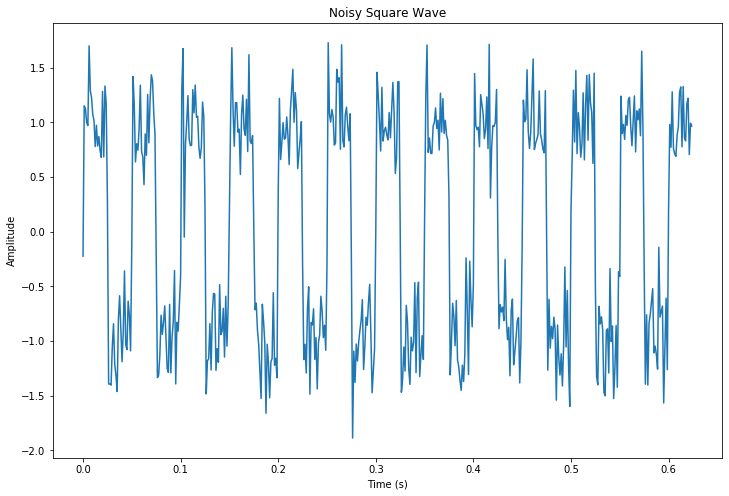

In [66]:
# Noisy square using the function given

A2=4.0/np.pi # Amplitude of the sin wave
f21=20.0 # frequency of the sin wave in Hz
T2=1/f21
fs2=800
Ts2=1/fs2 # horizontal spacing of the points that "fake" a continuous signal
cycles2=300 # how many cycles of the wave to save
t2=np.arange(0,cycles2*T2,Ts2) # horizontal coordinate of your sin curve

x2=[0.]*int(((cycles2*T2)/Ts2))

for i in range(0,len(x2)):
    j=0
    for j in range(1,8):
        x2[i]+=A2*(np.sin(2*np.pi*(2*j-1)*f21*t2[i]))/(2*j-1) # vertical value of your sin curve
    x2[i]+=np.random.normal(0,.3)
#print(len(x2))

plt.figure(figsize=(12,8))
plt.plot(t2[0:500],x2[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Noisy Square Wave")
plt.show()

# 2 b)

1200


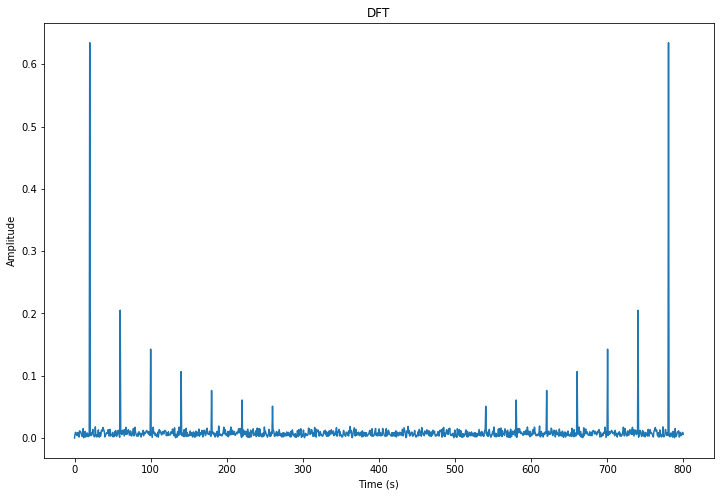

Run time: 102.406 s


In [67]:
# Spliting the noisy square wave into 10 segments and doing the DFT on each but just plotting one segment

import time
time_start = time.process_time()
#run your code


r=int(len(x2)/10)
print(r)
seg1=[0.]*r
seg2=[0.]*r
seg3=[0.]*r
seg4=[0.]*r
seg5=[0.]*r
seg6=[0.]*r
seg7=[0.]*r
seg8=[0.]*r
seg9=[0.]*r
seg10=[0.]*r

k=1200
for i in range(0,r):
    seg1[i]=x2[i]
    seg2[i]=x2[i+1*k]
    seg3[i]=x2[i+2*k]
    seg4[i]=x2[i+3*k]
    seg5[i]=x2[i+4*k]
    seg6[i]=x2[i+5*k]
    seg7[i]=x2[i+6*k]
    seg8[i]=x2[i+7*k]
    seg9[i]=x2[i+8*k]
    seg10[i]=x2[i+9*k]

tsam=1/fs2
sf = np.linspace(0, 1 / tsam , r)
dft1=DFT(seg1)
dft2=DFT(seg2)
dft3=DFT(seg3)
dft4=DFT(seg4)
dft5=DFT(seg5)
dft6=DFT(seg6)
dft7=DFT(seg7)
dft8=DFT(seg8)
dft9=DFT(seg9)
dft10=DFT(seg10)


plt.figure(figsize=(12,8))
plt.plot(sf,np.abs(dft1)/r)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("DFT")
plt.show()




time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)


# 2 c)

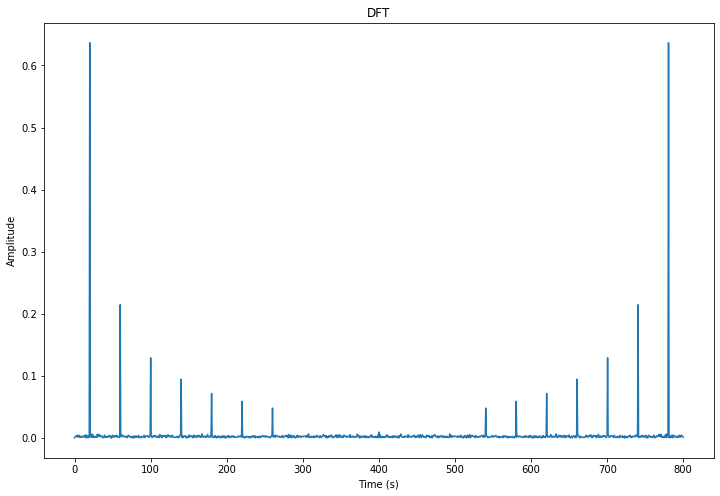

Run time: 10.906 s


In [68]:
# Averaging the 10 segments into one avg array and then applying DFT on the averaged array

time_start = time.process_time()
#run your code

avgDFT=[0.]*r

for i in range(0,r):
    avgDFT[i]=(seg1[i]+seg2[i]+seg3[i]+seg4[i]+seg5[i]+seg6[i]+seg7[i]+seg8[i]+seg9[i]+seg10[i])/10

avgdft=DFT(avgDFT)

plt.figure(figsize=(12,8))
plt.plot(sf,np.abs(avgdft)/r)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("DFT")
plt.show()



time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

# 2 d)

C:\Anaconda\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


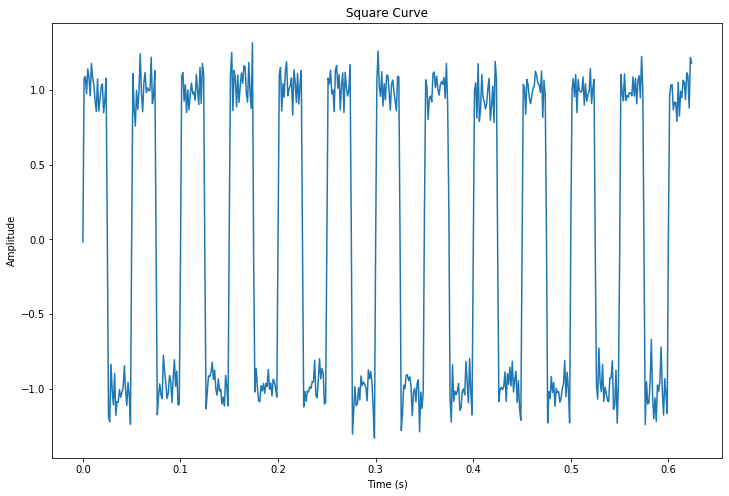

Run time: 5.281 s


In [69]:
# IDFT on the averaged DFT which results in the noise reduction from original wave

time_start = time.process_time()
#run your code

idftAVG=IDFT(avgdft)


plt.figure(figsize=(12,8))
plt.plot(t2[0:500],idftAVG[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Square Curve")
plt.show()

time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

# 3 a)

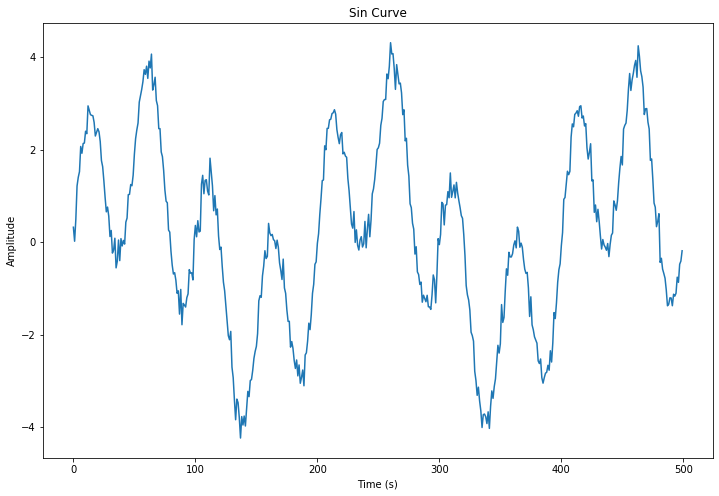

In [63]:
# Noisy imput given

A31=2
f31=50.0
T31=1/f31
fs31=50*f31
Ts31=1/fs31
cycles31=5
t31=np.arange(0,cycles*T31,Ts31)
i=0
y=[0.]*len(t31)
while i < len(t31):
    y[i]=A31*np.sin(2*np.pi*f31*t31[i])+A31*np.sin(.5*np.pi*f31*t31[i])+np.random.normal(0,.2)
    i+=1
plt.figure(figsize=(12,8))  
plt.plot(y[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Sin Curve")
plt.show()



In [52]:
# Recalling functions of mine from previous labs to use to convolve and generate low pass sinc kernels

def myconv(list1,list2):
    len1=len(list1)
    len2=len(list2)
    
    # Below we assign the longer list to x and shorter list to h to ensure the elements compiling efficiency
    if len1> len2:
        h=list2
        x=list1
    else:
        h=list1
        x=list2
    len3=len1+len2-1
    #print(len3)
    y=[0]*len3
    i=0
    # below we loop through summing up our elements as h moves through x 
    for i in range(0,len3):
        j=0
        for j in range(0,len(h)):
            if i-j >=0:
                if i-j < len(x):
                    y[i]+=x[i-j]*h[j]
                    #print(y[i], x[i-j], h[j], i,j,i-j)
    return y
def lowSync(L5):
    lsyn=[0]*L5
    i=0
    k=1/100000000
    sum=0
    L8=int(L5/2)
    for i in range(-L8,L8):
        if i==0:
            lsyn[i+L8]=np.sin(i+k)/(i+k)
            #print(lsyn[i+L8],i+1,np.sin(i))
        else:
            lsyn[i+L8]=np.sin(i)/(i)
        sum +=lsyn[i+L8]
        #print(i)
    j=0
    for j in range(0,L5):
        lsyn[j]= lsyn[j]/sum
        #print(lsyn[j])
    return lsyn

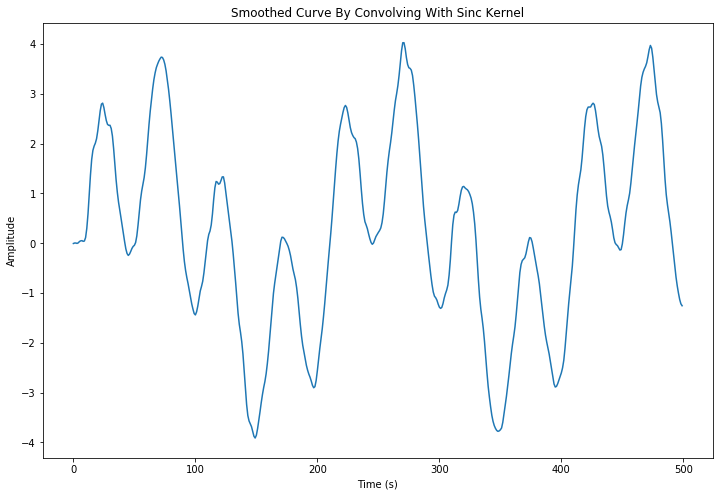

In [64]:
# Generating 20 kernels of low pass sinc and convolving with the signal given in 3a)

sinc=lowSync(20)
convolve=myconv(sinc,y)

plt.figure(figsize=(12,8))  
plt.plot(convolve[0:500])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Smoothed Curve By Convolving With Sinc Kernel")
plt.show()

# 3 b)

C:\Anaconda\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


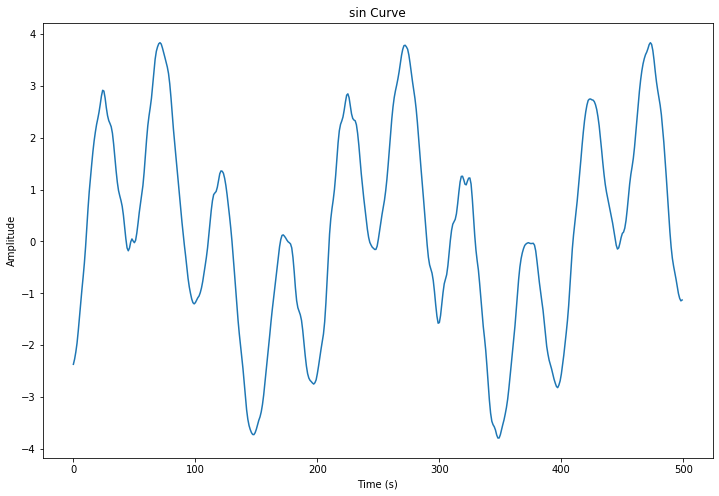

Run time: 124.156 s


In [54]:
# Apply DFT to signal given in 3a and 20 point sinc kernels and multiplying them to see the same result from 3a) convolve

import time
time_start = time.process_time()
#run your code

sinc1=[0.]*len(y)

for j in range(0,20):
    sinc1[j]=sinc[j]

bDFT=DFT(sinc1)
b2DFT=DFT(y)

product=[0.]*len(y)

for i in range(0,len(y)):
    product[i]=bDFT[i]*b2DFT[i]
    
bIDFT=IDFT(product)

plt.figure(figsize=(12,8))
plt.plot(bIDFT[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("sin Curve")
plt.show()


time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

# 3 c)

C:\Anaconda\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


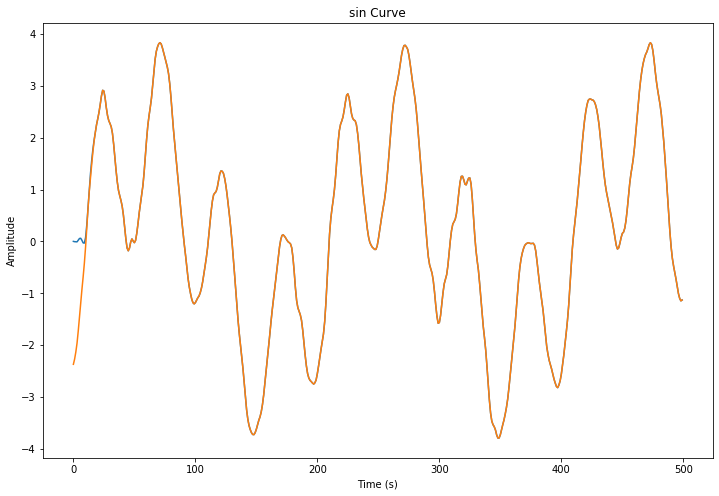

In [55]:
# Plotting the conolve and 3b) method on same plot to see that they are pretty much the same except the edge of convolve 

plt.figure(figsize=(12,8))
plt.plot(convolve[0:500])
plt.plot(bIDFT[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("sin Curve")
plt.show()

# 3 d)

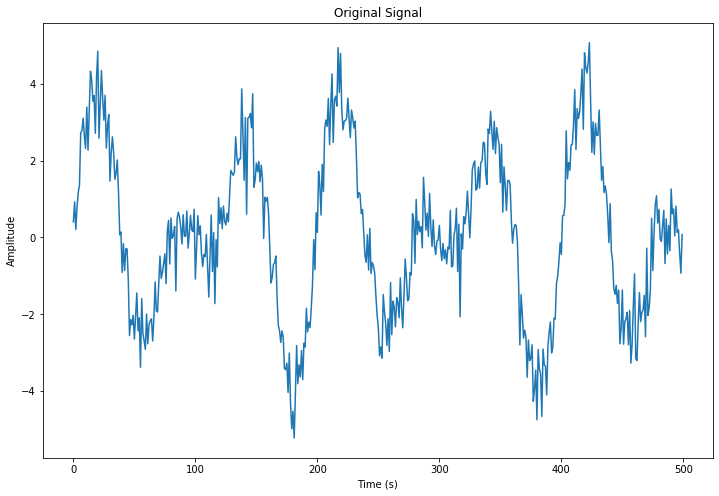

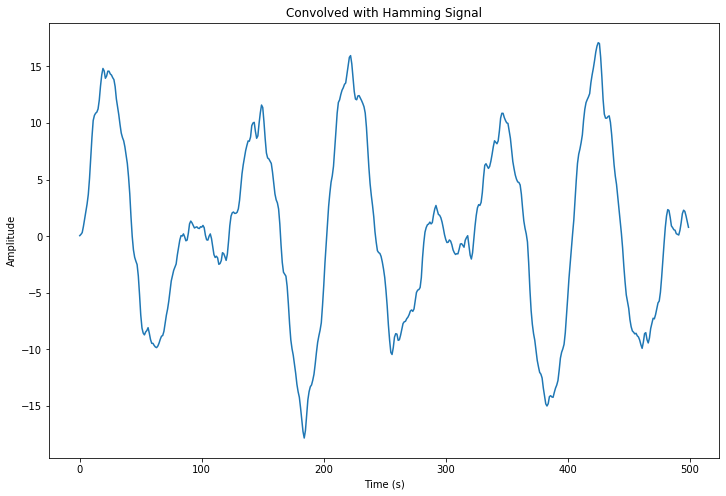

In [56]:
# Convolving given function with a 8 point Hamming window function 

A51=2
f51=50.0
T51=1/f51
fs51=100*f51
Ts51=1/fs51
cycles51=5
t51=np.arange(0,cycles*T51,Ts51)
i=0
x51=[0.]*len(t51)
while i < len(t51):
    x51[i]=A51*np.sin(2*np.pi*f51*t51[i])+A51*np.sin(3*np.pi*f51*t51[i])+np.random.normal(0,.6)
    i+=1
rad=len(x51)

plt.figure(figsize=(12,8))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Original Signal")
plt.plot(x51[0:500])
plt.show()


hamm2=ham(8)


convolveB=myconv(hamm2,x51)

rad=len(convolveB)

plt.figure(figsize=(12,8))  
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Convolved with Hamming Signal")
plt.plot(convolveB[0:500])
plt.show()

# The hamming window seems to reduce the noise in the signal signicantly

# 3 e)

C:\Anaconda\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


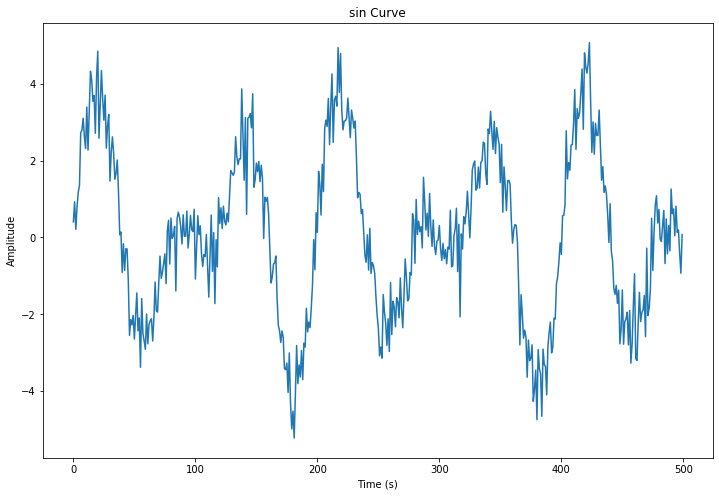

Run time: 503.906 s


In [57]:
# Applied the DFT to both output from 3d) convolved signal and the hamming window. Then divided the output with the hamming
# window which is then passed to IDFT. The result can be seen to return the original signal given in 3d) 

time_start = time.process_time()
#run your code

hammPadded=[0.]*rad

for i in range(0,8):
    hammPadded[i]=hamm2[i]

df1=DFT(convolveB)
df2=DFT(hammPadded)

quo=[0.]*rad

for j in range(0,rad):
    quo[j]=df1[j]/df2[j]

idf1=IDFT(quo)


plt.figure(figsize=(12,8))
plt.plot(idf1[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("sin Curve")
plt.show()



time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

# 3 f)

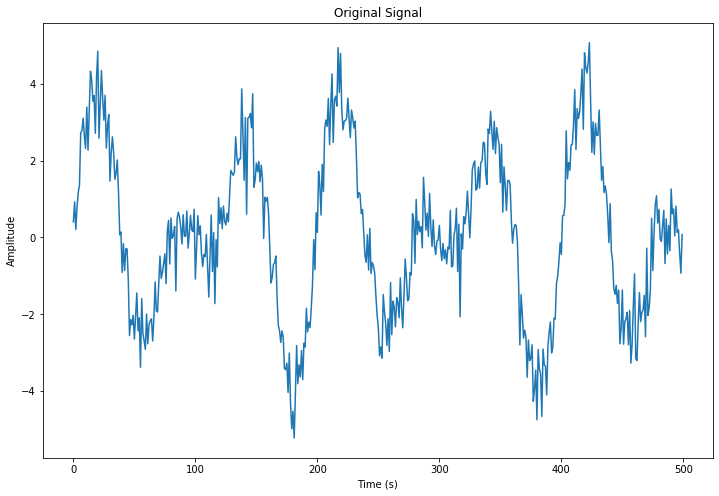

C:\Anaconda\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


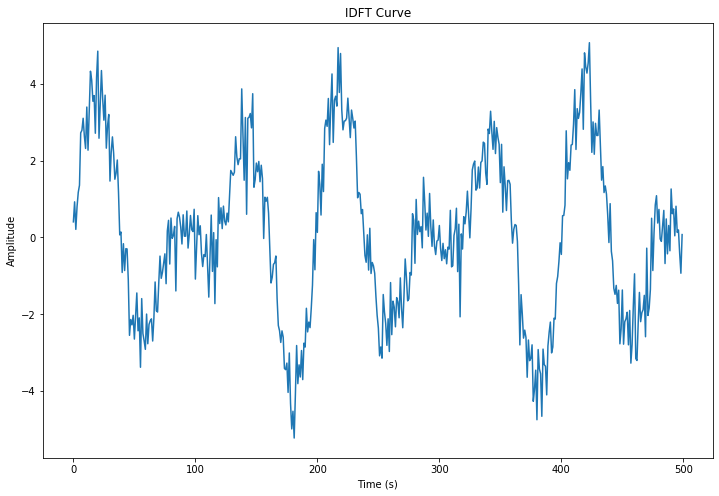

In [60]:
# Plotting both to compare

plt.figure(figsize=(12,8))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Original Signal")
plt.plot(x51[0:500])
plt.show()

plt.figure(figsize=(12,8))
plt.plot(idf1[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("IDFT Curve")
plt.show()

# 4 a)

44100


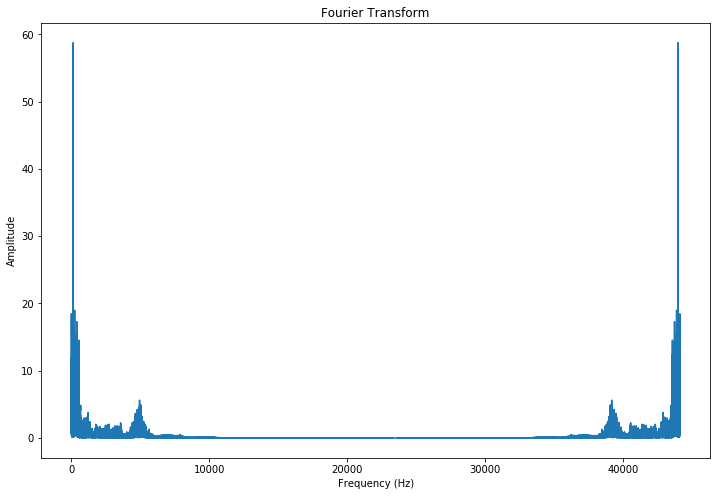

In [41]:
import IPython
from scipy.io import wavfile

# Uploading quick brown fox sound
# Plotting dft to see original signal

IPython.display.Audio("LAB1.wav")
fsM, data = wavfile.read("LAB1.wav") #fs012 is the sampling rate
QBF1 = data[:,0] # Left Channel
QBF2 = data[:,1] # Right Channel
print(fsM)

tM=1/fsM
fM = np.linspace(0, 1 / tM , len(QBF1))

outdft=np.fft.fft(QBF1)

plt.figure(figsize=(12,8))
plt.plot(fM,np.abs(outdft)/len(QBF1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title("Fourier Transform")
plt.show()

IPython.display.Audio("LAB1.wav")

In [36]:
from scipy import signal

# Low pass filter with cutoff frequency of 8000 Hz 

low_cutoff = 8000
nyq= 0.5 * fsM
normal_cutoff= low_cutoff / nyq
b, a = signal.butter(8, normal_cutoff, btype='low', analog=False)
output = signal.filtfilt(b, a, QBF1)
Mlen=len(output)
print(Mlen)


filtered_out = np.asarray(output, dtype=np.int16)
wavfile.write('MEfilt.wav',fsM,filtered_out)

IPython.display.Audio("MEfilt.wav")

170285


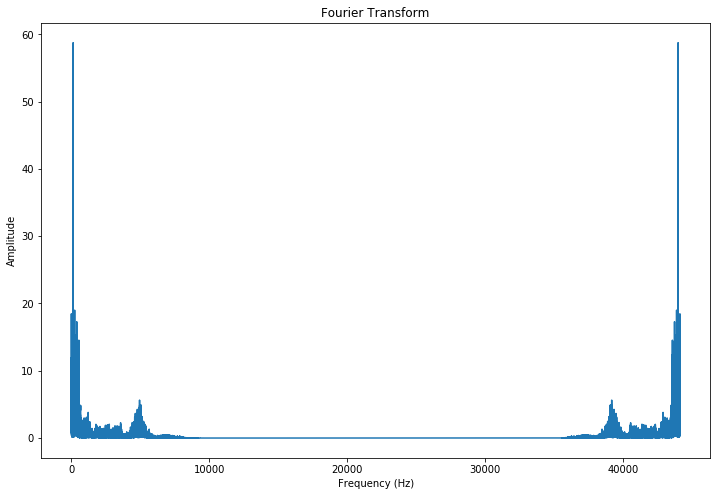

Run time: 0.359 s


In [37]:
# DFT of first filtered audio

time_start = time.process_time()
#run your code

tM=1/fsM
fM = np.linspace(0, 1 / tM , Mlen)

outD=np.fft.fft(output)

plt.figure(figsize=(12,8))
plt.plot(fM,np.abs(outD)/Mlen)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title("Fourier Transform")
plt.show()

time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)


# 4 b)

In [42]:
# Multiplying by the cosine which shifts DFT signals closer towards the centre 

mod=[0.]*Mlen

for i in range(0,Mlen):
    mod[i]=output[i]*2*np.cos((2*np.pi*low_cutoff*i)/fsM)

    

# 4 c)

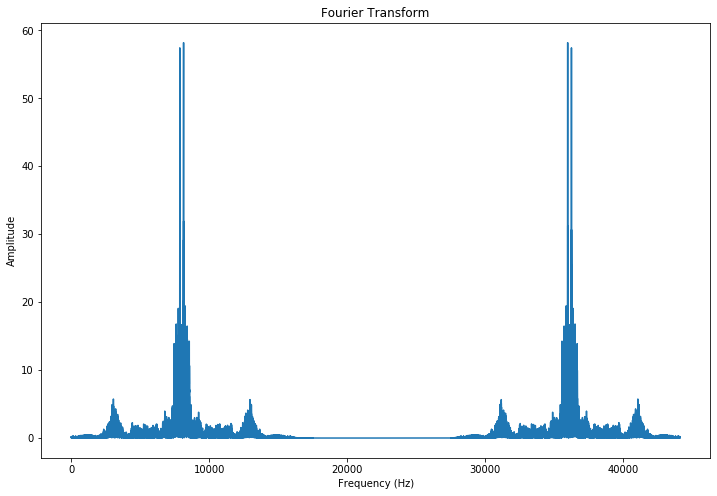

In [43]:
modDFT=np.fft.fft(mod)

plt.figure(figsize=(12,8))
plt.plot(fM,np.abs(modDFT)/Mlen)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title("Fourier Transform")
plt.show()

# DFT shows us that the frequencies have been shifted towards the centre of the spectrum and no longer contain the 
# peak at the same frequencies as the original sound

# 4 d) and e)

In [48]:
# Filtering again using same low pass and saving the audio file

low_cutoff01 = 8000
nyq01= 0.5 * fsM
normal_cutoff01= low_cutoff01 / nyq01
b01, a01 = signal.butter(8, normal_cutoff01, btype='low', analog=False)
output01 = signal.filtfilt(b01, a01, mod)


filtered_out01 = np.asarray(output01, dtype=np.int16)
wavfile.write('4E.wav',fsM,filtered_out01)

IPython.display.Audio("4E.wav")

# 4 f)

In [58]:
# Reversing the scrambled audio by using same filter and doing the following: filtering, multiplying by the cosine function
# that shifts the frequencies, and then filtering using the same filter again while maintaining the same cutoff frequency

low_cutoff012 = 8000
nyq012= 0.5 * fsM
normal_cutoff012= low_cutoff012 / nyq012
b012, a012 = signal.butter(8, normal_cutoff012, btype='low', analog=False)
output012 = signal.filtfilt(b012, a012, output01)

mod2=[0.]*Mlen

for i in range(0,Mlen):
    mod2[i]=output012[i]*2*np.cos((2*np.pi*low_cutoff012*i)/fsM)
    
low_cutoff013 = 8000
nyq013= 0.5 * fsM
normal_cutoff013= low_cutoff013 / nyq013
b013, a013 = signal.butter(8, normal_cutoff013, btype='low', analog=False)
output013 = signal.filtfilt(b013, a013, mod2)

filtered_out013 = np.asarray(output013, dtype=np.int16)
wavfile.write('4F.wav',fsM,filtered_out013)

IPython.display.Audio("4F.wav")